- **Nama**: Berwyn Izzut Taghyir
- **Cohort Id**: MC006D5Y2292

## Loading Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df=pd.read_csv('https://drive.google.com/uc?id=1F8AU8UxLVZEYXTYafxlSOOP-4Tv85K-3')
df.head()

,author,published_at,updated_at,like_count,text
0,@antinrmlmusic,2024-12-20T12:05:04Z,2024-12-20T12:05:04Z,7482,"Pre-save : <a href=""https://orcd.co/garamdanma..."
1,@jasmineqalsya5128,2025-04-14T07:36:32Z,2025-04-14T07:36:32Z,0,Jir garammararamkaram dan madusungdung tak tun...
2,@AdreenaOshine-ip7qj,2025-04-14T06:58:15Z,2025-04-14T06:58:15Z,0,Pacar lu itu yg lu ajak nyanyi aku dah lupa ap...
3,@airestilisnawati,2025-04-14T06:35:42Z,2025-04-14T06:35:42Z,0,Kamu orang Indonesia kan
4,@MuhammadRapaZiyadi,2025-04-14T06:25:31Z,2025-04-14T06:25:31Z,0,100jt😂


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   author        25241 non-null  object
 1   published_at  25247 non-null  object
 2   updated_at    25247 non-null  object
 3   like_count    25247 non-null  int64 
 4   text          25247 non-null  object
dtypes: int64(1), object(4)
memory usage: 986.3+ KB


In [4]:
df.isnull().sum()

author          6
published_at    0
updated_at      0
like_count      0
text            0
dtype: int64

In [5]:
df.duplicated().sum()

7

In [6]:
df.drop_duplicates(inplace=True)

## Preprocessing Text

In [9]:
pd.options.mode.chained_assignment=None

import numpy as np

seed=0
np.random.seed(seed)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ryzen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ryzen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

 
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
 
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari kiri dan kanan teks
    return text
 
def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text
 
def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text
 
def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy",
                          'aaa', 'aaaa', 'aaaaa', 'yok', 'yuk', 'yah', 'yak', 'min', 'kalo', 'pa', 'gini', 'href href',
                          'ji', 'ro', 'si', 'cok', 'br', 'href', 'amp', 'com', 'www', 'https', 'youtube', 'watch', 'v', 
                          'k0ubs6bhhu4', 't', 'a', '1', 'you', 'i'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

 
def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
 
    # Memecah teks menjadi daftar kata
    words = text.split()
 
    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]
 
    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)
 
    return stemmed_text
 
def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [11]:
slangwords={
    '@': 'di',
    'abis': 'habis',
    'wtb': 'beli',
    'masi': 'masih',
    'wts': 'jual',
    'wtt': 'tukar',
    'bgt': 'banget',
    'bgtt':'banget',
    'gua':'saya',
    'bangettt':'banget',
    'maks': 'maksimal',
    'gk': 'nggak',
    'ga': 'nggak',
    'gw': 'saya',
    'gue': 'saya',
    'ajaa': 'aja',
    'pake': 'pakai',
    'liat': 'lihat',
    'keliatan': 'kelihatan',
    'udah': 'sudah',
    'ntar': 'nanti',
    'bgd': 'banget',
    'sampe': 'sampai',
    'dpt': 'dapat',
    'tdk': 'tidak',
    'sm': 'sama',
    'tp': 'tapi',
    'dr': 'dari',
    'jg': 'juga',
    'aja': 'saja',
    'blm': 'belum',
    'trs': 'terus',
    'ni': 'ini',
    'tu': 'itu',
    'dmn': 'dimana',
    'knp': 'kenapa',
    'dlm': 'dalam',
    'lg': 'lagi',
    'ny': 'nya',
    'yg': 'yang',
    'org': 'orang',
    'seruuu': 'seru',
    'kerenn':'keren',
    'kerennn':'keren',
    'adek':'adik',
    'bgttt':'banget',
    'bgtttt':'banget',
    'bangett':'banget',
    'klo':'kalo',
    'jd':'jadi',
    'kane':'enak',
    'kek':'seperti',
    'lu':'kamu',
    'jt':'juta'
}

def fix_slangwords(text):
    words=text.split()
    fixed_words=[]
    
    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)
    
    fixed_text=' '.join(fixed_words)
    return fixed_text

In [12]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['text'].apply(cleaningText)
 
# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)
 
# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)
 
# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)
 
# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)
 
# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [13]:
df.head()

,author,published_at,updated_at,like_count,text,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,@antinrmlmusic,2024-12-20T12:05:04Z,2024-12-20T12:05:04Z,7482,"Pre-save : <a href=""https://orcd.co/garamdanma...",Presave a href,presave a href,presave a href,"[presave, a, href]",[presave],presave
1,@jasmineqalsya5128,2025-04-14T07:36:32Z,2025-04-14T07:36:32Z,0,Jir garammararamkaram dan madusungdung tak tun...,Jir garammararamkaram dan madusungdung tak tun...,jir garammararamkaram dan madusungdung tak tun...,jir garammararamkaram dan madusungdung tak tun...,"[jir, garammararamkaram, dan, madusungdung, ta...","[jir, garammararamkaram, madusungdung, tung, t...",jir garammararamkaram madusungdung tung tung
2,@AdreenaOshine-ip7qj,2025-04-14T06:58:15Z,2025-04-14T06:58:15Z,0,Pacar lu itu yg lu ajak nyanyi aku dah lupa ap...,Pacar lu itu yg lu ajak nyanyi aku dah lupa ap...,pacar lu itu yg lu ajak nyanyi aku dah lupa ap...,pacar kamu itu yang kamu ajak nyanyi aku dah l...,"[pacar, kamu, itu, yang, kamu, ajak, nyanyi, a...","[pacar, ajak, nyanyi, dah, lupa, nggak]",pacar ajak nyanyi dah lupa nggak
3,@airestilisnawati,2025-04-14T06:35:42Z,2025-04-14T06:35:42Z,0,Kamu orang Indonesia kan,Kamu orang Indonesia kan,kamu orang indonesia kan,kamu orang indonesia kan,"[kamu, orang, indonesia, kan]","[orang, indonesia]",orang indonesia
4,@MuhammadRapaZiyadi,2025-04-14T06:25:31Z,2025-04-14T06:25:31Z,0,100jt😂,jt,jt,juta,[juta],[juta],juta


## Ekstraksi Fitur dan Pelabelan Data

### Pelabelan Data

In [14]:
import csv
import requests
from io import StringIO
 
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")
 
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()
 
response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub
 
if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma
 
    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [15]:
# Fungsi untuk menentukan polaritas sentimen dari tweet
 
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
 
    score = 0
    # Inisialisasi skor sentimen ke 0
 
    for word in text:
        # Mengulangi setiap kata dalam teks
 
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen
 
    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)
 
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen
 
    polarity=''
    # Inisialisasi variabel polaritas
 
    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score==0):
        polarity='neutral'
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
 
    return score, polarity
    # Mengembalikan skor sentimen dan polaritas teks

In [16]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
neutral     9666
positive    9490
negative    6084
Name: count, dtype: int64


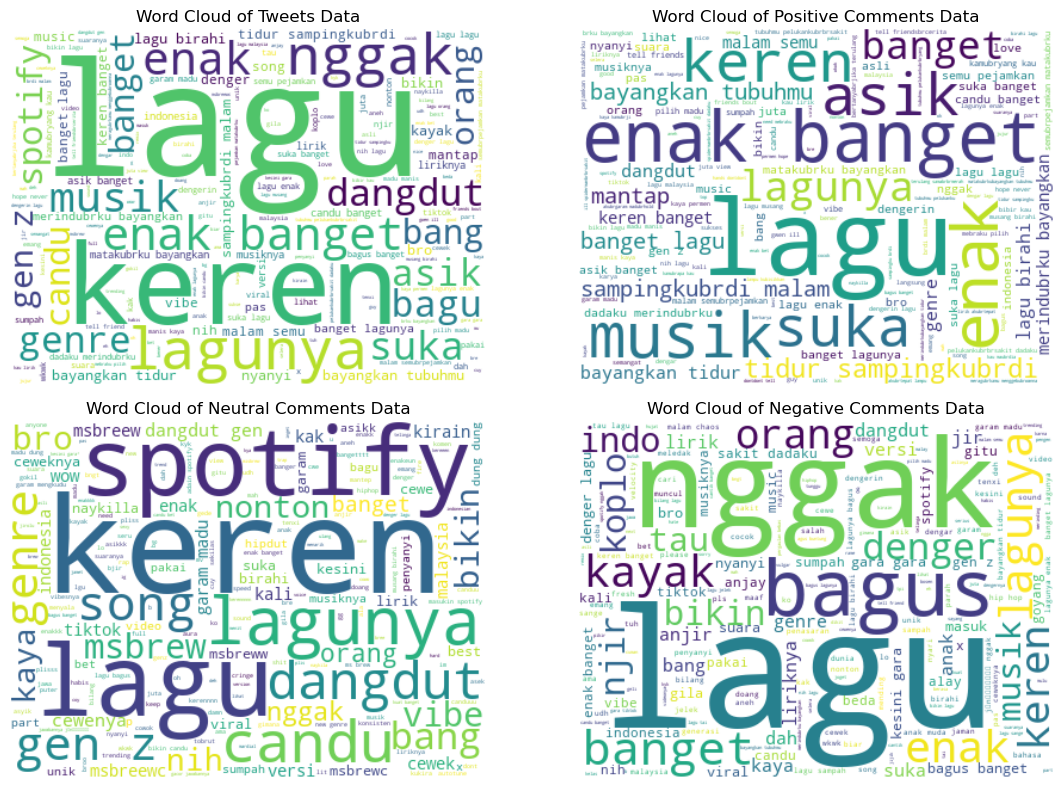

In [17]:
all_text = ' '.join(df['text_akhir'])
positive_text = ' '.join(df[df['polarity'] == 'positive']['text_akhir'])
negative_text = ' '.join(df[df['polarity'] == 'negative']['text_akhir'])
neutral_text = ' '.join(df[df['polarity'] == 'neutral']['text_akhir'])

# Buat objek WordCloud
wc = WordCloud(width=400, height=300, background_color='white', colormap='viridis')

# Plot
plt.figure(figsize=(12, 8))

# Semua data
plt.subplot(2, 2, 1)
plt.imshow(wc.generate(all_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets Data')

# Data positif
plt.subplot(2, 2, 2)
plt.imshow(wc.generate(positive_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Comments Data')

# Data netral
plt.subplot(2, 2, 3)
plt.imshow(wc.generate(neutral_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Neutral Comments Data')

# Data negatif
plt.subplot(2, 2, 4)
plt.imshow(wc.generate(negative_text), interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Negative Comments Data')

plt.tight_layout()
plt.show()

### Ekstraksi Fitur

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


X = df['text_akhir']
y = df['polarity']
 
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=7000,     # Lebih banyak fitur bisa bantu model belajar lebih baik
                        ngram_range=(1, 2),     # Termasuk unigram dan bigram
                        sublinear_tf=True,      # TF scaling untuk frekuensi besar
                        stop_words='english')
X_tfidf = tfidf.fit_transform(X)
 
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
 
# Menampilkan hasil ekstraksi fitur
features_df

,aaaaaa,aamiin,abad,abang,abangnya,abiezz,abiss,abisss,absen,absolute,...,yutub,zaman,zayn,zina,zinah,𝐃𝐄w𝘈do𝘙𝐀,𝐃𝑂𝙍а𝟩,𝐄𝐗𝐎էօէօ,𝙈𝘼𝙉𝙐𝙏,𝚊𝚔𝚞
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## Algoritma Pelatihan Machine Learning

### TF IDF

#### Skema 1: Naive Bayes + TF-IDF

In [20]:
from sklearn.naive_bayes import BernoulliNB
 
# Membuat objek model Naive Bayes (Bernoulli Naive Bayes)
naive_bayes = BernoulliNB()
 
# Melatih model Naive Bayes pada data pelatihan
naive_bayes.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())
 
# Evaluasi akurasi model Naive Bayes
accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)
 
# Menampilkan akurasi
print('Naive Bayes - accuracy_train:', accuracy_train_nb)
print('Naive Bayes - accuracy_test:', accuracy_test_nb)

Naive Bayes - accuracy_train: 0.7710479397781299
Naive Bayes - accuracy_test: 0.722068145800317


#### Skema 2: Decision Tree + TF-IDF

In [21]:
from sklearn.tree import DecisionTreeClassifier
 
# Membuat objek model Decision Tree
decision_tree = DecisionTreeClassifier()
 
# Melatih model Decision Tree pada data pelatihan
decision_tree.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())
 
# Evaluasi akurasi model Decision Tree
accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)
 
# Menampilkan akurasi
print('Decision Tree - accuracy_train:', accuracy_train_dt)
print('Decision Tree - accuracy_test:', accuracy_test_dt)

Decision Tree - accuracy_train: 0.9937599049128367
Decision Tree - accuracy_test: 0.8684627575277337


#### Skema 3: Random Forest + TF-IDF

In [22]:
from sklearn.ensemble import RandomForestClassifier
 
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()
 
# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9937599049128367
Random Forest - accuracy_test: 0.8833201267828843


## Word2Vec

In [23]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
import nltk

# Download tokenizer
nltk.download('punkt')

# Tokenisasi
df['tokens'] = df['text_akhir'].apply(lambda x: word_tokenize(x.lower()))

# Train-test split
X_train_tokens, X_test_tokens, y_train, y_test = train_test_split(df['tokens'], df['polarity'], test_size=0.2, random_state=42)

# Gabungkan semua token untuk pelatihan Word2Vec
all_tokens = X_train_tokens.tolist()

# Train Word2Vec
w2v_model = Word2Vec(sentences=all_tokens, vector_size=100, window=5, min_count=2, workers=4)

# Fungsi untuk merata-rata vektor kata dalam satu dokumen
def document_vector(doc):
    doc = [word for word in doc if word in w2v_model.wv]
    if len(doc) == 0:
        return np.zeros(w2v_model.vector_size)
    return np.mean(w2v_model.wv[doc], axis=0)

# Transformasi token ke vektor dokumen
X_train_vec = np.array([document_vector(doc) for doc in X_train_tokens])
X_test_vec = np.array([document_vector(doc) for doc in X_test_tokens])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ryzen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Skema 4: Random Forest + Word2Vec

In [24]:
# Random Forest Classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train_vec, y_train)

# Prediksi
y_pred_train_rf = random_forest.predict(X_train_vec)
y_pred_test_rf = random_forest.predict(X_test_vec)

# Akurasi
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

# Output
print('Random Forest (Word2Vec) - accuracy_train:', accuracy_train_rf)
print('Random Forest (Word2Vec) - accuracy_test:', accuracy_test_rf)

Random Forest (Word2Vec) - accuracy_train: 0.9977218700475435
Random Forest (Word2Vec) - accuracy_test: 0.7414817749603804


### CountVectorizer

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Ekstraksi fitur dengan CountVectorizer
vectorizer = CountVectorizer(max_features=750, min_df=15, max_df=0.9)
X_count = vectorizer.fit_transform(X)

# Konversi ke DataFrame
features_df = pd.DataFrame(X_count.toarray(), columns=vectorizer.get_feature_names_out())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.2, random_state=42)


#### Skema 5: Random Forest + CountVectorizer

In [26]:
from sklearn.ensemble import RandomForestClassifier
 
# Membuat objek model Random Forest
random_forest = RandomForestClassifier()
 
# Melatih model Random Forest pada data pelatihan
random_forest.fit(X_train.toarray(), y_train)
 
# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())
 
# Evaluasi akurasi model Random Forest
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)
 
# Menampilkan akurasi
print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 0.9536450079239303
Random Forest - accuracy_test: 0.8589540412044374


## Metode Deep Learning

### Metode CNN

In [27]:
from tensorflow.keras.callbacks import Callback

class StopAtValAccuracy(Callback):
    def __init__(self, target=0.92):
        super().__init__()
        self.target = target

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        if val_acc is not None:
            if val_acc >= self.target:
                print(f"\nTarget val_accuracy {self.target} tercapai! Stop training.")
                self.model.stop_training = True

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.activations import swish
from tensorflow.keras.layers import BatchNormalization


# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=10000,     # Lebih banyak fitur bisa bantu model belajar lebih baik
                        ngram_range=(1, 2),     # Termasuk unigram dan bigram
                        sublinear_tf=True,      # TF scaling untuk frekuensi besar
                        stop_words='english')
X_tfidf = tfidf.fit_transform(df['text_akhir']).toarray()

# Label encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['polarity'])  # kolom target
y_categorical = to_categorical(y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_categorical, test_size=0.2,
    stratify=y_encoded, random_state=42
)

model = Sequential([
    Dense(512, activation='swish', input_shape=(X_tfidf.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='swish'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(128, activation='swish'),
    Dropout(0.1),
    Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    verbose=1
)

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)
class_weights = dict(enumerate(class_weights))

target_acc_callback = StopAtValAccuracy(target=0.92)

history = model.fit(
    X_train, y_train,
    epochs=50,                   
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr, target_acc_callback],
    class_weight=class_weights,  
    verbose=1
)

train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 38s 95ms/step - accuracy: 0.7420 - loss: 1.0230 - val_accuracy: 0.8534 - val_loss: 1.2646 - learning_rate: 0.0010
Epoch 2/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 30s 93ms/step - accuracy: 0.9219 - loss: 0.6321 - val_accuracy: 0.8730 - val_loss: 0.7428 - learning_rate: 0.0010
Epoch 3/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9360 - loss: 0.5452 - val_accuracy: 0.8786 - val_loss: 0.7730 - learning_rate: 0.0010
Epoch 4/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9423 - loss: 0.5395
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
316/316 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - accuracy: 0.9423 - loss: 0.5396 - val_accuracy: 0.8734 - val_loss: 0.8290 - learning_rate: 0.0010
Epoch 5/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.9571 - loss: 0.5079 - val_accuracy: 0.8954 - val_loss: 0.6732 - learning_rate: 5.0000e-04
Epoch 6/50
316/316 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.9788 -

In [32]:
print(f"\nTrain Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 1.00
Test Accuracy: 0.92


Jadi dengan menggunakan Deep Learning dapat menghasilkan akurasi 0.92 pada data tes

## Inference

In [33]:
# Simpan model Keras ke file .h5
model.save("sentiment_model.h5")

# Simpan TF-IDF vectorizer
import pickle
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

# Simpan LabelEncoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)

In [36]:
import pickle
import numpy as np
from tensorflow.keras.models import load_model

# Load model dan tools
model = load_model('sentiment_model.h5')

with open('tfidf_vectorizer.pkl', 'rb') as f:
    tfidf_vectorizer = pickle.load(f)

with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Fungsi preprocessing sederhana
def preprocess(text):
    return text.lower()

# === USER INPUT ===
user_input = input("Masukkan komentar YouTube: ")

# Preprocessing dan vektorisasi
cleaned_input = preprocess(user_input)
vectorized_input = tfidf_vectorizer.transform([cleaned_input]).toarray()

# Prediksi
prediction = model.predict(vectorized_input)
predicted_class = np.argmax(prediction, axis=1)
predicted_label = label_encoder.inverse_transform(predicted_class)[0]

# Output
print("\nHasil Klasifikasi:")
print(f"Komentar     : {user_input}")
print(f"Sentimen     : {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step

Hasil Klasifikasi:
Komentar     : keren banget
Sentimen     : positive
